# Convolution, Correlation

In [1]:
import numpy as np
import scipy as sp
print(sp.__version__)

from matplotlib import pyplot as plt
import TP02_sub
try:
    %matplotlib widget
except:
    pass

1.7.2


## 1. Convolution

### 1.1 Introduction


### 1.2 Convolution with a dirac

1. Run the cell below without any modification. In this example a centered gaussian pulse (signal `a`), with 101 samples, is being convolved with a Dirac function (signal `b`), with 51 samples. What is the length of the convolution output `c1` relative to signal `a` and `b` (check the workspace ```%whos```)? What does `c1` look like ($a(t)\ast \delta(t)=?$)?

Variable   Type       Data/Info
-------------------------------
a          ndarray    101: 101 elems, type `float64`, 808 bytes
b          ndarray    51: 51 elems, type `float64`, 408 bytes
c          ndarray    151: 151 elems, type `float64`, 1208 bytes


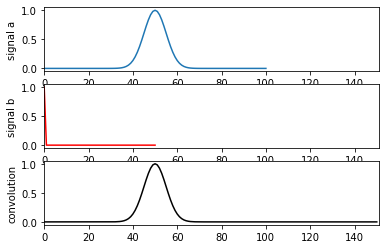

In [2]:
import scipy.signal

a   = sp.signal.gaussian(101,5)
b   = np.zeros(51)
b[0]= 1
c   = np.convolve(a,b)
TP02_sub.make_plts(a,b,c)
%whos ndarray

$\color{blue}{\text{We need to find the convolution output c1 relative to the two signals.}}$
$\color{blue}{\text{From the values given above we can observe that len(c1)=len(b)+len(c)-1}}$
$\color{blue}{\text{which is len(c)=101+51-1 which correcsponds to the value printed (151)}}$
$\color{blue}{\text{a(t) is the Gaussian pulse and δ(t) is the Dirac delta function.}}$
$\color{blue}{\text{Concolving the two functions above shifts the Gaussian pulse by the Dirac delta function.}}$
$\color{blue}{\text{The dirac delta function causes the gaussian curve to spread and causing it to be wider as can be seen in the third diagram.}}$
$\color{blue}{\text{While the gaussian pulse is still centered at the same value, it carries energy for a longer time (beyond the defined time axis here while in the }}$
$\color{blue}{\text{original gaussian pulse, the pulse stops at 100}}$

2. Change the location of the Dirac pulse (initially located at 1st element), at let's say element 25, and run the script again $\square$. What is happening? Can you see a simple application of this property ($a(t)\ast \delta(t-\alpha)=?$)?

Variable   Type       Data/Info
-------------------------------
a          ndarray    101: 101 elems, type `float64`, 808 bytes
b          ndarray    51: 51 elems, type `float64`, 408 bytes
c          ndarray    151: 151 elems, type `float64`, 1208 bytes


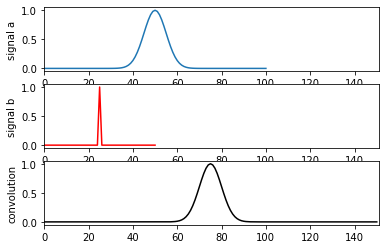

In [3]:
b   = np.zeros(51)
b[25]= 1
c   = np.convolve(a,b)
TP02_sub.make_plts(a,b,c)
%whos ndarray

$\color{blue}{\text{Shifting the dirac pulse to the 25th element means having a peak at the 25th element rather than at the first.}}$
$\color{blue}{\text{This means that we are shifting the dirac delta function to the right. We can see on the diagram of signal b that the peak is further to the right}}$
$\color{blue}{\text{Its convolution with the Gaussian pulse causes it to shift to the right as well, causing its peak to occur further in time.}}$
$\color{blue}{\text{Application idk??}}$

Variable   Type       Data/Info
-------------------------------
a          ndarray    101: 101 elems, type `float64`, 808 bytes
b          ndarray    51: 51 elems, type `float64`, 408 bytes
c          ndarray    151: 151 elems, type `float64`, 1208 bytes


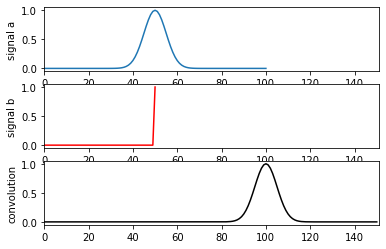

In [4]:
b   = np.zeros(51)
b[50]= 1
c   = np.convolve(a,b)
TP02_sub.make_plts(a,b,c)
%whos ndarray

Variable   Type       Data/Info
-------------------------------
a          ndarray    101: 101 elems, type `float64`, 808 bytes
b          ndarray    51: 51 elems, type `float64`, 408 bytes
c          ndarray    151: 151 elems, type `float64`, 1208 bytes


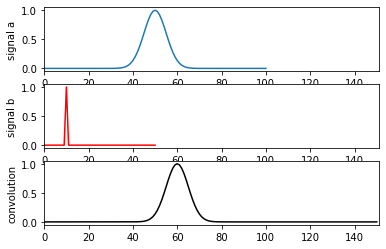

In [5]:
b   = np.zeros(51)
b[10]= 1
c   = np.convolve(a,b)
TP02_sub.make_plts(a,b,c)
%whos ndarray

$\color{darkblue}{\text{Taking the dirac pulse located at the 25th position as reference,}}$
$\color{blue}{\text{Now, varying the location of the dirac pulse to be located to the 50th element, shifts the convoluted gaussian curve further on the x-axis.}}$
$\color{blue}{\text{Moving the dirac pulse to the 10th element moves it to the left and hence the convoluted signal to the left.}}$

3. Re-run the convolution a the Gaussian and the dirac with the option `'same'` activated $\square$. Try again different location for the Dirac pulse (e.g., sample 0, 25 and 50).

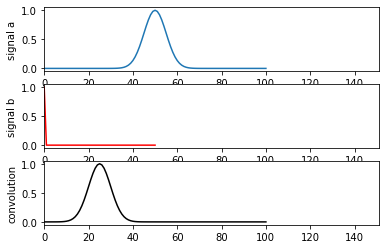

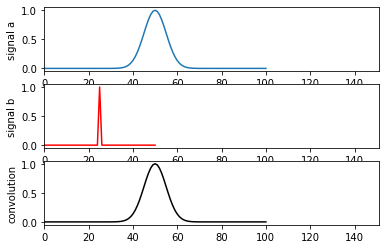

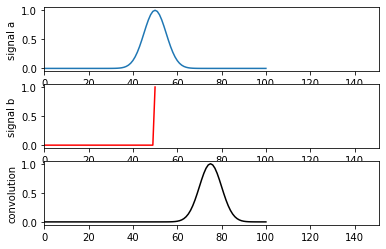

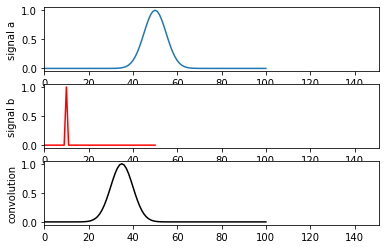

In [6]:
b   = np.zeros(51)
#Since we want to visualise the convolution using different locations, I will use a loop to generate 3 different sets of graphs
#Using the same values as above
dirac_pulse_loc=[0,25,50,10]
for l in dirac_pulse_loc:
    b[l]=1
    c=np.convolve(a,b,mode='same')
    TP02_sub.make_plts(a,b,c)
    b[l]=0

4. - Define a and b so they have the same length to make the element-wise product possible in the Fourier domain.
- Using `np.fft.fft()`, define $A$ and $B$ the Fourier transforms of signals $a$ and $b$ respectively.
- Compute $C2$, the element-wise product of $A$ and $B$. 
- $C2$ is the Fourier spectra of the time domaine convolution $c2$. We need to apply the inverse Fourier transform `np.fft.ifft()` in order to get A and B back in the time domain. This function is the same as the forward `np.fft.fft()` that you already used, except for a sign change in the exponential term and a scale factor equal to the length of the input signal. Due to some numerical noise affecting the discrete Fourier transform (beyond the scope of this lab work), `np.fft.ifft()` returns, instead of real values, complex values with very small imaginary part. We only keep the real part using : `np.real(np.fft.ifft())`. Complete the script below according to all these steps.
- compute also $c$, the convolution computed with `np.convolve(a,b,mode='same')` for comparison (keeping the mode='same', but you can also try without to get the full picture).
- run the script. If you properly defined $c2$, you should see it on the resulting figure as a yellow dashed line in the convolution panel. Is it what you were expecting? What is the difference with $c$?

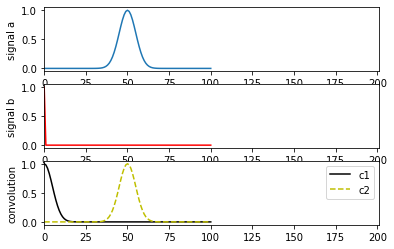

In [7]:
a   = sp.signal.gaussian(101,5)
b   = np.zeros(101)
b[0]= 1

A = np.fft.fft(a) #Fourier transforms of signal 𝑎
B = np.fft.fft(b) #Fourier transforms of signal b
C2= A*B #the element-wise product of 𝐴 and  𝐵
c2= np.real(np.fft.ifft(C2)) #real part of fourier transform of C2
c   = np.convolve(a,b,mode='same')
TP02_sub.make_plts(a,b,c,c2)

$\color{blue}{\text{c and c2 have the same shape but are located at different points on the axis. Their peaks do not align.}}$
$\color{blue}{\text{This may be due to the approximations introduced in the program when using fft and ifft.}}$
$\color{blue}{\text{Those approximations become significant when computed for a larger number of points.}}$
$\color{blue}{\text{Given that 101 points is a relatively large value, those effects approximations can be seen on the graph plotted.}}$

 - Modify your code accordingly and check that $c2 = c$ ($\square$).

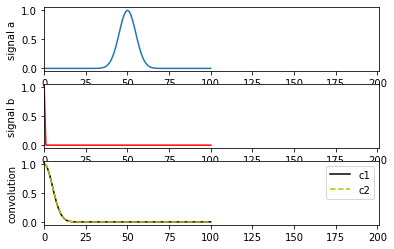

In [8]:
a   = sp.signal.gaussian(101,5)
b   = np.zeros(101)
b[0]= 1

pad = np.zeros(len(a)-1)
A = np.fft.fft(np.concatenate((a,np.zeros(len(b)-1))))
B = np.fft.fft(np.concatenate((b,np.zeros(len(a)-1))))
C2= A * B
c2 = np.real(np.fft.ifft(C2))

c2 = c2[50:151]

c   = np.convolve(a,b,mode='same')
TP02_sub.make_plts(a,b,c,c2)

### 1.3 Some other examples

1. **Gaussian $\mathbf{\ast}$ Boxcar**: keeping the same gaussian pulse defined as signal $a$, modify $b$ to get a 30 points wide boxcar window. Compute the convolution product $a \ast b$ ($\square$). In a few words, explain the effect of convolving a function that include sharp edges with a gaussian pulse.

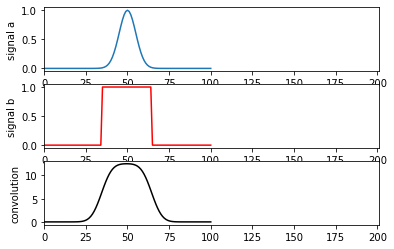

In [9]:
def make_conv_alt(a,b,mode='same'):
    c = np.convolve(a, b, mode=mode)
    return c

a   = sp.signal.gaussian(101,5)
b   = np.zeros(101)
b[101//2-15:101//2+15] = 1
c   = make_conv_alt(a,b,mode='same')
TP02_sub.make_plts(a,b,c)

$\color{blue}{\text{It smoothes out the sharp edges of the boxcar window}}$

2. **Ricker $\mathbf{\ast}$ Comb**: using the ```sp.signal.ricker(101,2)``` function , define $a$ as a Ricker pulse. Modify $b$ to get a Comb function with a 25 points period. Compute the convolution product $a \ast b$. What can you observe? Knowing that the Fourier transform of a Comb function is an other Comb, what is the effect of this convolution on the amplitude spectrum of the output signal $|C|$ as compared to $|A|$? Plot them both ($\square$).

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1.]


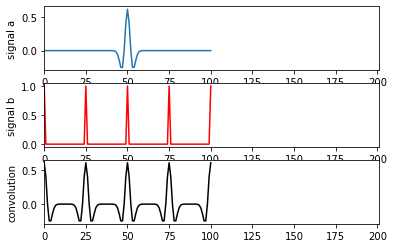

In [10]:
a   = sp.signal.ricker(101,2)
b   = np.zeros(101)
b[::25]= 1
print(b)
c   = np.convolve(a,b,mode='same')
TP02_sub.make_plts(a,b,c)

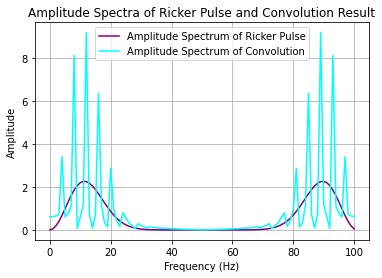

In [11]:
A=np.abs(np.fft.fft(a))
C=np.abs(np.fft.fft(c))
plt.figure()
plt.plot(A,label='Amplitude Spectrum of Ricker Pulse',color='purple')
plt.plot(C,label='Amplitude Spectrum of Convolution',color='cyan')
plt.legend()
plt.grid("True")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectra of Ricker Pulse and Convolution Result')
plt.show()
# both |A| and |C|


3. **Synthetic Seismic Trace**: 

- Load both signals a and b from the file **TP02_trace1.mat**. Discarding the noise term, compute the convolution product: ```c=np.convolve(a,b,$'$same$')```. Plot $a$, $b$ and $c$ ($\square$). What is the main issue if you want to interpret $c$ (the actual output of the seismic acquisition) as the reflectivity profile of the medium? 

- Have a look at the source term $b$ and its corresponding amplitude spectrum $B$ ($\square$). What are the main characteristics of this signal? In the next section, you should understand why this kind of signal is actually used as source term in seismic land survey.

Text(0.5, 1.0, 'a,b and c on the same figure')

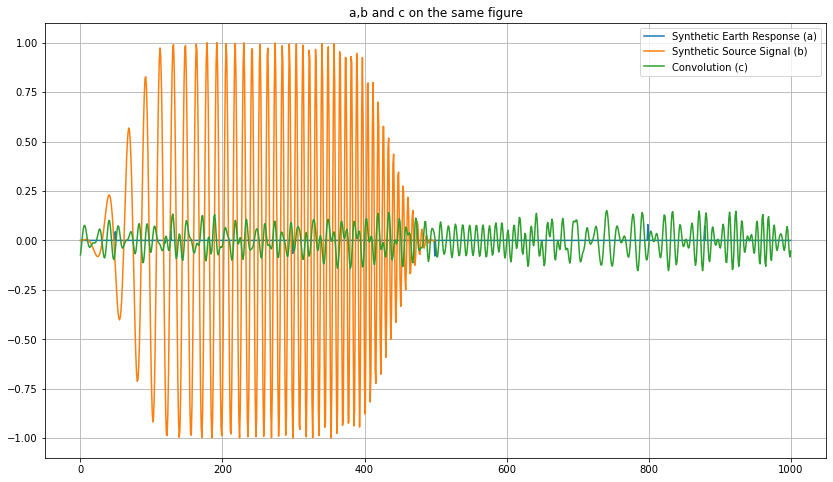

In [12]:
data = TP02_sub.read_matv73('TP02_trace1.mat')
a = data['a']
b=data['b']
c = np.convolve(a, b, 'same')
plt.figure(figsize=(14, 8))
plt.plot(a, label='Synthetic Earth Response (a)')
plt.plot(b, label='Synthetic Source Signal (b)')
plt.plot(c, label='Convolution (c)')
plt.legend()
plt.grid(True)
plt.title('a,b and c on the same figure')


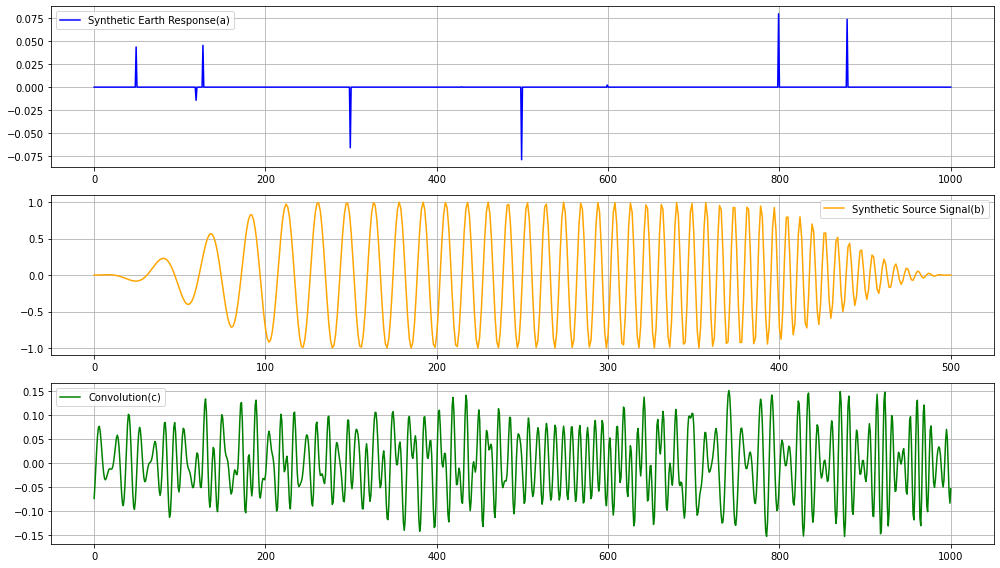

In [13]:
plt.figure(figsize=(14, 8))
plt.subplot(311)
plt.plot(a, label='Synthetic Earth Response(a)', color='blue')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.subplot(312)
plt.plot(b, label='Synthetic Source Signal(b)', color='orange')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.subplot(313)
plt.plot(c, label='Convolution(c)', color='green')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

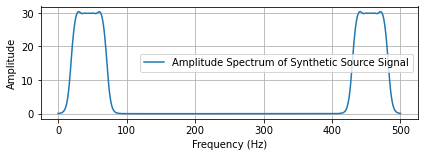

In [14]:
B=np.abs(np.fft.fft(b))
plt.plot(b, label='Source Signal(b)')
plt.legend()
plt.subplot(212)
plt.plot(B, label='Amplitude Spectrum of Synthetic Source Signal')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.grid(True)
plt.show()

$\color{blue}{\text{It is a chirp signal. From the figure above, we can say that b allows for variation over a wide frequency range}}$

## 2. Correlation


### 2.1 Some basic properties

1. Run the cell below without any modification \ovalbox{F}. In this example a Ricker pulse is being convolved by itself. This is an auto-correlation. 
    - What is the central value (i.e. $\tau=0$) of the correlation output : ```c1(50)=?``` 
    - Based on equation 5, and for $\tau=0$, can you explain your observation according to the input vector $a=b$? Give a compact analytic expression and verify numerically. Remember that at its origin $\tau=0$, the auto-correlation corresponds to the energy $E$ of the input signal (i.e the square of the euclidian norm of the input signal)

4.0
4.0


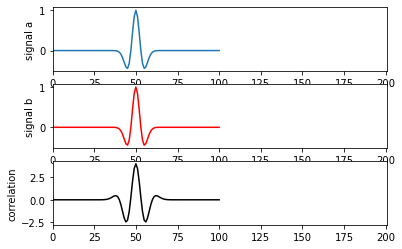

In [15]:
a   = sp.signal.ricker(101,3)*2
b   = a
c   = np.convolve(a,b[::-1], 'same')
TP02_sub.make_plts(a,b,c,label_c='correlation')
c1_50 = np.sum(a**2)
print(c1_50)
print(c[50])

$\color{blue}{\text{c1(50) is correlation output,i.e it occurs when the signal correlates with itself with no time delay. At }}$ $\tau=0$ ,
$c1(50)=\int_{-\infty}^{+\infty}x(t)y^*(t-0)dt$ $\color{blue}{\text{where x(t)=y(t) in this case.}}$
$\color{blue}{\text{So}}$ $c1(50)=\int_{-\infty}^{+\infty}a(t)*a(t)dt$ $\color{blue}{\text{when convoluting a signal with itself.}}$

2. Intuitively, adding random noise to one of the two signals will reduce the similarity between the two. Initially set to zero, a noise level (```noise_lvl```). This random noise is simply added to signal $b$. Try different values (0.1, 0.5, 1, 2,5) and look at the resulting cross-correlations $\square$ (for each noise level, run the script several times). Comment on the effect of noise level increasing. What about the shape of the cross-correlation function? what about its amplitude relative to $a$ and $b$?

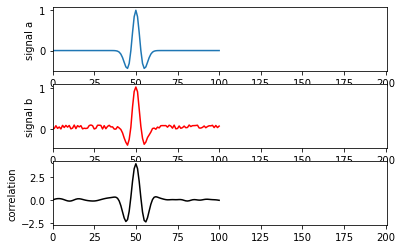

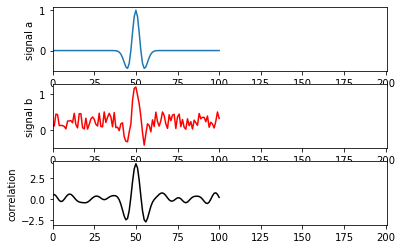

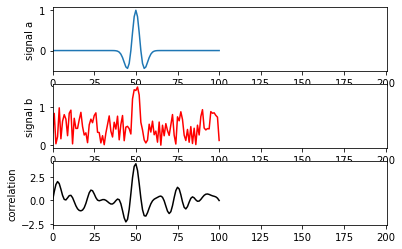

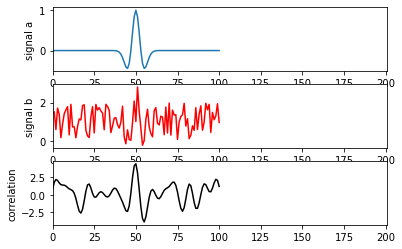

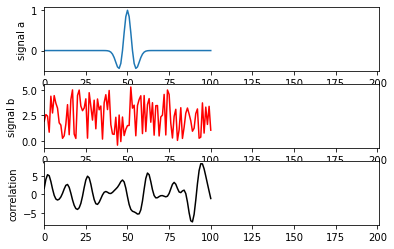

In [16]:
a   = sp.signal.ricker(101,3)*2

noise_lvl_arr =[0.1,0.5,1,2,5]
for noise_lvl in noise_lvl_arr:
    b   = a + np.random.random(a.shape)*noise_lvl
    c   = np.convolve(a,b[::-1], 'same')
    TP02_sub.make_plts(a,b,c,label_c='correlation')

$\color{blue}{\text{Increasing the noise level in the signal b creates a signal that is very noisy and has a lot of variation in amplitude.}}$
$\color{blue}{\text{Since the correlation of the a and b is a function of the 2 signals, the correlation also produces a noisy output, with more variations in amplitude.}}$
$\color{blue}{\text{The similarities between signal a and the noisy signal b decrease as we increase the noise level}}$
$\color{blue}{\text{The correlation of the signals show that as the noise level increases, the peak C1(50) shifts from the true time delay.}}$
$\color{blue}{\text{For example for the graphs for noise level 50, we observe various peaks, as our correlation function detects more noise and creates more peaks}}$
$\color{blue}{\text{due to the presence of more noise elements, which would otherwise not be present in noise-free signals.}}$
$\color{blue}{\text{With increasing noise levels, the amplitude of the cross-correlation decreases relative to a and b.}}$
$\color{blue}{\text{This may be because the presence of noise makes it difficult for the program to find similarities between the signals a and b}}$

3. In order to have an absolute measurement of similarity, it is common to normalize the cross-correlation by the product of the euclidian norms of both input signals. At $\tau=0$, this normalized cross-correlation corresponds to the correlation coefficient between the two input signals. 
    - Modify the script accordingly, by computing the norm of both $a$ and $b$ ($\sqrt{\sum\limits_{i}x_i^2}$); and compute the correlation coefficient between $a$ and $b$ for different value of ```noise_lvl``` $\blacksquare$ $\square$ 
    - How does this coefficient vary with increasing level of noise?

correlation coefficient= 0.9621989070025496


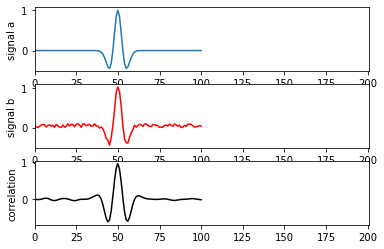

In [17]:
a   = sp.signal.ricker(101,3)*2
noise_lvl = 0.1
b   = a + np.random.random(a.shape)*noise_lvl

norm_a = np.sqrt(np.sum(a**2))
norm_b = np.sqrt(np.sum(b**2))


c   =  np.convolve(a, b[::-1], 'same')
c   = c / (norm_a*norm_b)

TP02_sub.make_plts(a,b,c,label_c='correlation')
print('correlation coefficient=' ,c[50])

4. Similar to question 4 of section 1.2, you can propose an implementation of the correlation (**c2=?**) based of the Fourier transform $\blacksquare$.

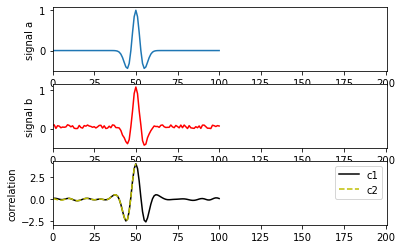

In [18]:
a   = sp.signal.ricker(101,3)*2
noise_lvl = 0.1
b   = a + np.random.random(a.shape)*noise_lvl

# computation of the fft with a zero-padding
A = np.fft.fft(a)
B = np.fft.fft(b)

C2= A*B  #compute the cross-spectrum
c2 = np.real(np.fft.ifft(C2)) #back in the time-domain
c2 = c2[50:151] # match the option 'same'

c   = np.convolve(a,b,mode='same') # compute c1 for comparison
TP02_sub.make_plts(a,b,c,c2,label_c='correlation')

### 2.2 Correlation as a match filter

1. What is the effect of correlating $c(t)$ of equation 3 (Discarding the noise term) with the source term $b(t)$. Use equation 4 and remember that the convolution is associative: $(x \ast y)\ast z=x\ast (y\ast z)$.
2. Compute the auto-correlation of the source term (the chirp) as defined earlier $\square$. 
    - What is the shape of the output compared to the input signal? Is it more or less impulsive? 
    - Could you comment on the relation between the 'sharpness' in time of this auto-correlation, and the spectrum of the *chirp*? 
    *help: what is the sharpest function you know, and what is its amplitude spectrum?*
3. After loading the two signals (`TP02_sub.read_matv73('TP02_trace2.mat')`), compute the correlation of the synthetic seismic trace $a$ with the source term $b$ $\square$. 
    - Consider your initial Earth response. What can you say about the interpretation after this correlation? 
    - Why do we call that a **match filter** ?

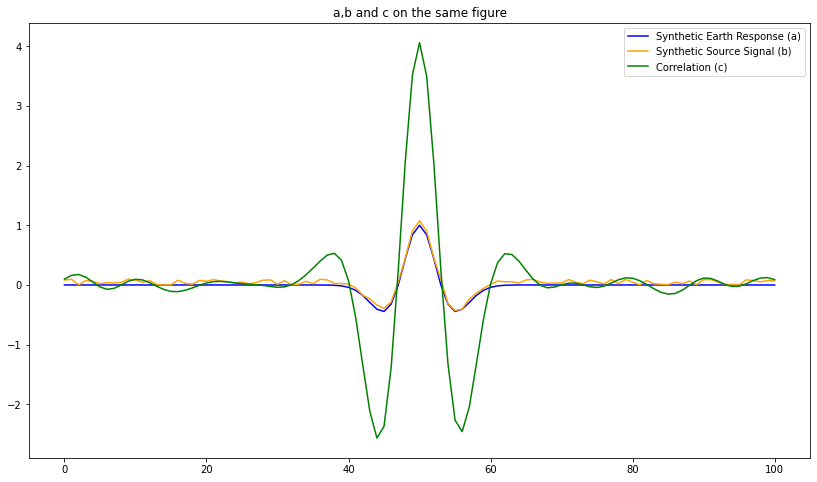

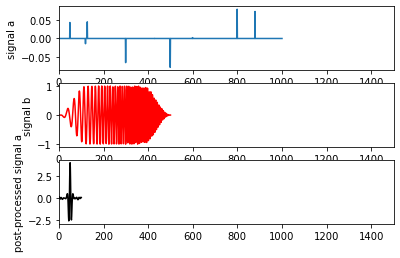

In [19]:
c = np.convolve(a,b[::-1],'same')
plt.figure(figsize=(14, 8))
plt.plot(a, label='Synthetic Earth Response (a)', color='blue')
plt.plot(b, label='Synthetic Source Signal (b)', color='orange')
plt.plot(c, label='Correlation (c)', color='green')
plt.legend()
plt.title('a,b and c on the same figure')

TP02_sub.make_plts(data['a'],data['b'],c,label_c='post-processed signal a')

$\color{darkblue}{\text{Q(1)}}$
$\color{blue}{\text{Equation 3 is 𝑐(𝑡)=𝑎(𝑡)∗𝑏(𝑡)+𝑛𝑜𝑖𝑠𝑒.}}$
$\color{blue}{\text{We want to correlate c(t) with b(t). This can be written as c(t)*b(t) = (a(t)*b(t))*b(t) = a(t)*(b(t)*b(t)).}}$ 
$\color{blue}{\text{Hence we convolute a with a correlation of b.}}$
$\color{blue}{\text{By correlating the seismic trace with the source term, we are effectively enhancing the signal that matches the source term.}}$
$\color{blue}{\text{We do so by reducing noise and other signals that do not match.}}$
$\color{blue}{\text{We hence get a clearer output with distinct pulses.}}$
$\color{blue}{\text{By convoluting b with itself, we get a clearer source signal to convolute with the signal a.}}$

$\color{darkblue}{\text{Q(2)}}$
$\color{blue}{\text{The output signal produces clearer impulses and is much easier to read than the input signal.}}$
$\color{blue}{\text{The correlation output produced above produces peaks only when the seismic trace matches with the source signal.}}$
$\color{blue}{\text{We hence have fewer peaks than the input signal and the graph is much more readable}}$

$\color{darkblue}{\text{Q(3)}}$
$\color{blue}{\text{In our case, the signal being searched is known( signal b).}}$
$\color{blue}{\text{It is called a matched filter because it clears up the signal by maximising the signal-to-noise ratio.}}$
$\color{blue}{\text{This is why we use the cross-correlation function on the signal b.}}$
$\color{blue}{\text{By correlating the seismic trace,a, with the source term,b,}}$
$\color{blue}{\text{we are enhancing the signal b by reducing noise and other signals that do not match.}}$
$\color{blue}{\text{This produces a much less noisy source signal.}}$